# 📊 Nelson-Siegel Yield Curve Interactive Analysis

**A Comprehensive Guide to Yield Curve Modeling with Economic Insights**

---

This notebook provides an interactive exploration of the Nelson-Siegel yield curve model with detailed economic and financial explanations. You'll learn how to:

- 🎯 Understand the economic meaning behind yield curve shapes
- 📈 Explore Nelson-Siegel parameters interactively
- 🏛️ Compare Treasury and TIPS yield curves
- 📊 Analyze historical factor evolution
- 💼 Apply insights to real-world bond investment decisions

---

## 📚 Prerequisites

Make sure you have the required packages installed:

```bash
pip install -e ".[interactive]"  # Install with interactive features
# OR for full environment:
pip install -e ".[dev,interactive,data,notebooks]"
```


In [13]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
from pathlib import Path

# Add src directory to path (if running from examples directory)
src_path = Path.cwd().parent / "src"
if src_path.exists():
    sys.path.insert(0, str(src_path))

# Import nelson_siegel components
from nelson_siegel import (
    NelsonSiegelModel,
    TreasuryNelsonSiegelModel,
    TIPSNelsonSiegelModel,
    YieldCurveAnalyzer,
    YieldCurvePlotter,
    DataManager
)

# Try to import interactive components
try:
    from nelson_siegel.interactive import (
        InteractiveYieldCurveExplorer,
        HistoricalFactorExplorer,
        create_yield_curve_tutorial
    )
    import ipywidgets as widgets
    from IPython.display import display, HTML
    HAS_WIDGETS = True
    print("✅ Interactive widgets available!")
except ImportError as e:
    HAS_WIDGETS = False
    print(f"⚠️ Interactive widgets not available: {e}")
    print("Install with: pip install -e '.[interactive]'")

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')

print("📦 Libraries loaded successfully!")


✅ Interactive widgets available!
📦 Libraries loaded successfully!


## 🔬 Chapter 2: The Nelson-Siegel Model Deep Dive

### Mathematical Foundation

The Nelson-Siegel model represents yield curves using four parameters:

$$y(m) = \beta_0 + \beta_1 \left(\frac{1 - e^{-m/\tau}}{m/\tau}\right) + \beta_2 \left(\frac{1 - e^{-m/\tau}}{m/\tau} - e^{-m/\tau}\right)$$

Where:
- **$\beta_0$ (Level)**: Long-term rate, represents the yield when maturity approaches infinity
- **$\beta_1$ (Slope)**: Controls the short-term behavior and overall slope
- **$\beta_2$ (Curvature)**: Controls the curvature, particularly around the medium term
- **$\tau$ (Tau)**: Controls the exponential decay rate and determines where curvature peaks

### Economic Interpretation

#### 📊 **Level Factor ($\beta_0$)**
- Represents **long-term growth and inflation expectations**
- Higher $\beta_0$ → Higher expected long-term rates
- Influenced by central bank credibility and inflation targets

#### 📈 **Slope Factor ($\beta_1$)**  
- Captures **monetary policy stance**
- Negative $\beta_1$ → Normal upward-sloping curve (expansionary expectations)
- Positive $\beta_1$ → Inverted curve (contractionary policy/recession fears)

#### 🌊 **Curvature Factor ($\beta_2$)**
- Reflects **medium-term economic uncertainties**
- Positive $\beta_2$ → Humped curve (uncertainty around medium term)
- Negative $\beta_2$ → U-shaped curve (flight to medium-term quality)


🎯 Fitted Nelson-Siegel Parameters:
   Level (β₀): 4.666%
   Slope (β₁): 0.720%
   Curvature (β₂): -2.113%
   Tau (λ): 2.091 years

📊 Model Fit Quality:
   RMSE: 3.9 basis points


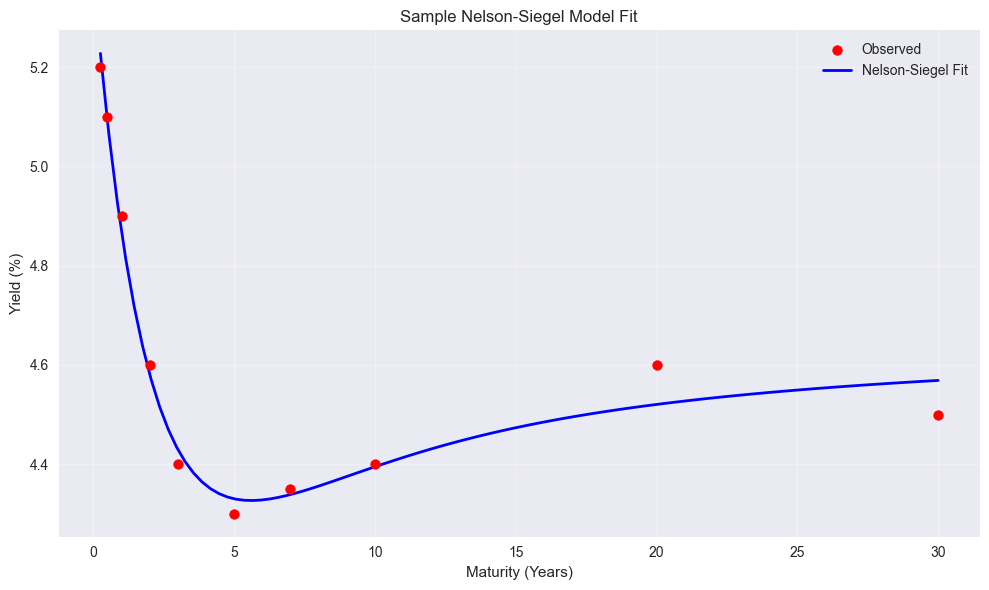

In [14]:
# Let's create sample data and fit a basic Nelson-Siegel model
if HAS_WIDGETS:
    # Create sample Treasury data
    from nelson_siegel import TreasuryNelsonSiegelModel, YieldCurvePlotter
    
    # Sample yield curve data (typical US Treasury curve)
    maturities = np.array([0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])
    yields = np.array([5.2, 5.1, 4.9, 4.6, 4.4, 4.3, 4.35, 4.4, 4.6, 4.5]) / 100
    
    # Initialize model and fit
    model = TreasuryNelsonSiegelModel()
    model.fit(maturities, yields)
    
    # Get the fitted parameters
    factors = model.get_factors()
    
    print("🎯 Fitted Nelson-Siegel Parameters:")
    print(f"   Level (β₀): {factors['Level']*100:.3f}%")
    print(f"   Slope (β₁): {factors['Slope']*100:.3f}%") 
    print(f"   Curvature (β₂): {factors['Curvature']*100:.3f}%")
    print(f"   Tau (λ): {factors['Tau']:.3f} years")
    
    # Calculate model fit quality
    predicted_yields = model.predict(maturities)
    rmse = np.sqrt(np.mean((yields - predicted_yields)**2)) * 10000  # in basis points
    print(f"\n📊 Model Fit Quality:")
    print(f"   RMSE: {rmse:.1f} basis points")
    
    # Create a basic plot
    plotter = YieldCurvePlotter()
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot observed vs fitted yields
    ax.scatter(maturities, yields*100, color='red', s=50, label='Observed', zorder=5)
    
    # Plot fitted curve
    maturity_range = np.linspace(0.25, 30, 100)
    fitted_curve = model.predict(maturity_range)
    ax.plot(maturity_range, fitted_curve*100, 'b-', linewidth=2, label='Nelson-Siegel Fit')
    
    ax.set_xlabel('Maturity (Years)')
    ax.set_ylabel('Yield (%)')
    ax.set_title('Sample Nelson-Siegel Model Fit')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Interactive widgets not available. Install with: pip install ipywidgets")


## 🎛️ Chapter 3: Interactive Parameter Exploration

Now let's explore how each parameter affects the yield curve shape using interactive widgets. This will help you understand the economic intuition behind each factor.


In [18]:
# Interactive Parameter Explorer
if HAS_WIDGETS:
    explorer = InteractiveYieldCurveExplorer()
    
    print("🎛️ Interactive Yield Curve Explorer")
    print("=" * 50)
    print("Use the sliders below to see how each parameter affects the yield curve:")
    print("• β₀ (Level): Controls long-term rates")
    print("• β₁ (Slope): Controls curve slope") 
    print("• β₂ (Curvature): Controls medium-term shape")
    print("• τ (Tau): Controls decay rate")
    print()
    
    # Display the interactive widget
    display(explorer.create_full_interactive_dashboard())
else:
    print("⚠️ Install ipywidgets to use interactive features: pip install ipywidgets")


🎛️ Interactive Yield Curve Explorer
Use the sliders below to see how each parameter affects the yield curve:
• β₀ (Level): Controls long-term rates
• β₁ (Slope): Controls curve slope
• β₂ (Curvature): Controls medium-term shape
• τ (Tau): Controls decay rate



## 🏛️ Chapter 4: Treasury vs TIPS Analysis

### Understanding Real vs Nominal Yields

**Treasury Securities** provide **nominal yields** that include:
- Real return
- Expected inflation
- Inflation risk premium

**TIPS (Treasury Inflation-Protected Securities)** provide **real yields** that are:
- Adjusted for actual inflation
- Protected against inflation risk
- Show true purchasing power returns

### Economic Insights from the Spread

The **TIPS-Treasury spread** reveals:
- **Market inflation expectations**
- **Inflation risk premium**
- **Liquidity differences**
- **Flight-to-quality effects**


In [19]:
# Interactive Treasury vs TIPS Comparison
if HAS_WIDGETS:
    from nelson_siegel import TIPSNelsonSiegelModel
    
    print("🏛️ Treasury vs TIPS Interactive Comparison")
    print("=" * 50)
    
    # Create Treasury explorer
    treasury_explorer = InteractiveYieldCurveExplorer(bond_type='treasury')
    print("📊 Treasury Securities (Nominal Yields)")
    display(treasury_explorer.create_full_interactive_dashboard())
    
    print("\n" + "="*60 + "\n")
    
    # Create TIPS explorer
    tips_explorer = InteractiveYieldCurveExplorer(bond_type='tips')
    print("🛡️ TIPS Securities (Real Yields)")
    display(tips_explorer.create_full_interactive_dashboard())
    
    print()
    print("💡 Economic Interpretation:")
    print("• When Treasury > TIPS: Positive inflation expectations")
    print("• Steeper Treasury curve: Higher long-term inflation expectations") 
    print("• Volatile TIPS: Changing real rate environment")
    print("• Converging curves: Low inflation expectations or deflation fears")
    
else:
    print("⚠️ Install ipywidgets for interactive Treasury vs TIPS comparison")


🏛️ Treasury vs TIPS Interactive Comparison
📊 Treasury Securities (Nominal Yields)




🛡️ TIPS Securities (Real Yields)



💡 Economic Interpretation:
• When Treasury > TIPS: Positive inflation expectations
• Steeper Treasury curve: Higher long-term inflation expectations
• Volatile TIPS: Changing real rate environment
• Converging curves: Low inflation expectations or deflation fears


## 📊 Chapter 5: Historical Factor Analysis

### Economic Cycles and Yield Curve Factors

Understanding how Nelson-Siegel factors evolve over time provides crucial insights into:

#### 🔄 **Business Cycle Patterns**
- **Expansion**: Level ↑, Slope ↓ (steepening), Curvature varies
- **Peak**: Level peaks, Slope becomes positive (inversion)
- **Recession**: Level ↓, Slope ↑ (steepening again), Curvature ↑
- **Recovery**: Level stabilizes, Slope normalizes, Curvature ↓

#### 🏦 **Monetary Policy Transmission**
- **Rate Hikes**: Immediate impact on Slope, delayed on Level
- **QE Programs**: Suppress Level and Curvature
- **Forward Guidance**: Affects Slope and medium-term expectations

#### 📈 **Market Stress Indicators**
- **High Curvature**: Flight-to-quality into intermediate bonds
- **Negative Level**: Deflation fears or extreme monetary accommodation
- **Volatile Tau**: Changing market structure or policy uncertainty


In [17]:
# Historical Factor Explorer
if HAS_WIDGETS:
    print("📊 Historical Factor Evolution Explorer")
    print("=" * 50)
    
    # Create historical factor explorer
    historical_explorer = HistoricalFactorExplorer()
    display(historical_explorer.create_historical_dashboard())
    
    print()
    print("📈 Key Patterns to Look For:")
    print("• Level trends: Long-term rate environment changes")
    print("• Slope inversions: Recession predictions")
    print("• Curvature spikes: Market stress or policy changes")
    print("• Tau stability: Market structure consistency")
    
else:
    print("⚠️ Install ipywidgets for historical factor analysis")


📊 Historical Factor Evolution Explorer
Loading Treasury historical factors...
Analyzing treasury data: 5725 observations
Date range: 2010-01-01 to 2025-09-03
Maturities: [0.08333333333333333, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 30.0] years
Progress: 0/5725 (0.0%)
Progress: 286/5725 (5.0%)
Progress: 572/5725 (10.0%)
Progress: 858/5725 (15.0%)
Progress: 1144/5725 (20.0%)
Progress: 1430/5725 (25.0%)
Progress: 1716/5725 (30.0%)
Progress: 2002/5725 (35.0%)
Progress: 2288/5725 (40.0%)
Progress: 2574/5725 (45.0%)
Progress: 2860/5725 (50.0%)
Progress: 3146/5725 (55.0%)
Progress: 3432/5725 (59.9%)
Progress: 3718/5725 (64.9%)
Progress: 4004/5725 (69.9%)
Progress: 4290/5725 (74.9%)
Progress: 4576/5725 (79.9%)
Progress: 4862/5725 (84.9%)
Progress: 5148/5725 (89.9%)
Progress: 5434/5725 (94.9%)
Progress: 5720/5725 (99.9%)
Successfully fitted 5725 out of 5725 dates
Loading TIPS historical factors...
Analyzing tips data: 5725 observations
Date range: 2010-01-01 to 2025-09-03
Maturities: [5.0, 7.0, 10

KeyboardInterrupt: 

## 💼 Chapter 6: Practical Investment Applications

### Portfolio Management Applications

#### 🎯 **Duration Matching**
- Use Nelson-Siegel parameters to construct duration-neutral portfolios
- Level factor exposure for long-term positioning
- Slope factor for yield curve steepening/flattening trades

#### 📈 **Relative Value Trading**
- Identify cheap/expensive bonds relative to fitted curve
- **Cheap bonds**: Trade below model prediction (positive residuals)
- **Expensive bonds**: Trade above model prediction (negative residuals)

#### ⚖️ **Risk Management**
- **Level risk**: Sensitivity to parallel yield curve shifts
- **Slope risk**: Sensitivity to yield curve steepening/flattening
- **Curvature risk**: Sensitivity to butterfly trades

### Central Bank Policy Analysis

#### 🏛️ **Policy Effectiveness**
- Track how policy changes affect each factor
- Measure transmission mechanisms through factor evolution
- Assess forward guidance effectiveness via slope factor


In [20]:
# Practical Trading Analysis
if HAS_WIDGETS:
    print("💼 Bond Relative Value Analysis")
    print("=" * 40)
    
    # Sample current market data
    current_maturities = np.array([2, 3, 5, 7, 10, 20, 30])
    current_yields = np.array([4.8, 4.6, 4.5, 4.55, 4.6, 4.8, 4.7]) / 100
    
    # Fit model and find cheap/expensive bonds
    model = TreasuryNelsonSiegelModel()
    model.fit(current_maturities, current_yields)
    
    # Calculate model predictions
    model_yields = model.predict(current_maturities)
    residuals = (current_yields - model_yields) * 10000  # in basis points
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Maturity': current_maturities,
        'Market_Yield': current_yields * 100,
        'Model_Yield': model_yields * 100,
        'Residual_bps': residuals,
        'Classification': ['Cheap' if r > 5 else 'Expensive' if r < -5 else 'Fair' for r in residuals]
    })
    
    print("🎯 Current Market Analysis:")
    print(results_df.round(1))
    
    print("\n💡 Trading Insights:")
    cheap_bonds = results_df[results_df['Classification'] == 'Cheap']
    expensive_bonds = results_df[results_df['Classification'] == 'Expensive']
    
    if len(cheap_bonds) > 0:
        print(f"🟢 Consider BUYING: {cheap_bonds['Maturity'].values}Y bonds (undervalued)")
    if len(expensive_bonds) > 0:
        print(f"🔴 Consider SELLING: {expensive_bonds['Maturity'].values}Y bonds (overvalued)")
    
    # Show model parameters for context
    factors = model.get_factors()
    print(f"\n📊 Model Parameters:")
    print(f"   Level: {factors['Level']*100:.2f}%")
    print(f"   Slope: {factors['Slope']*100:.2f}%")
    print(f"   Curvature: {factors['Curvature']*100:.2f}%")
    print(f"   Tau: {factors['Tau']:.2f} years")
        
else:
    print("⚠️ Install ipywidgets for interactive trading analysis")


💼 Bond Relative Value Analysis
🎯 Current Market Analysis:
   Maturity  Market_Yield  Model_Yield  Residual_bps Classification
0         2           4.8          4.8          -0.3           Fair
1         3           4.6          4.6           0.7           Fair
2         5           4.5          4.5          -0.9           Fair
3         7           4.6          4.5           0.2           Fair
4        10           4.6          4.6          -1.7           Fair
5        20           4.8          4.7           7.8          Cheap
6        30           4.7          4.8          -5.9      Expensive

💡 Trading Insights:
🟢 Consider BUYING: [20]Y bonds (undervalued)
🔴 Consider SELLING: [30]Y bonds (overvalued)

📊 Model Parameters:
   Level: 4.83%
   Slope: 1.60%
   Curvature: -3.09%
   Tau: 1.46 years


## 🎓 Chapter 7: Advanced Economic Interpretation

### Yield Curve Learning Tutorial

Let's create an interactive tutorial that tests your understanding of yield curve economics.


In [21]:
# Interactive Economic Tutorial
if HAS_WIDGETS:
    print("🎓 Yield Curve Economics Tutorial")
    print("=" * 40)
    
    # Create tutorial widget
    tutorial_widget = create_yield_curve_tutorial()
    display(tutorial_widget)
    
    print("\n📚 Additional Learning Resources:")
    print("• Federal Reserve Economic Data (FRED)")
    print("• Treasury.gov yield curve data")
    print("• Academic papers on Nelson-Siegel modeling")
    print("• Central bank research publications")
    
else:
    print("⚠️ Install ipywidgets for interactive tutorial")


🎓 Yield Curve Economics Tutorial


HTML(value='\n    <div style="background-color: #e8f4fd; padding: 20px; border-radius: 15px; margin: 15px 0;">…


📚 Additional Learning Resources:
• Federal Reserve Economic Data (FRED)
• Treasury.gov yield curve data
• Academic papers on Nelson-Siegel modeling
• Central bank research publications


## 🚀 Chapter 8: Summary and Next Steps

### Key Takeaways

🎯 **Nelson-Siegel Model Mastery**
- Understand the economic meaning behind each parameter
- Use interactive tools to build intuition
- Apply to real-world fixed income analysis

📊 **Practical Applications**
- Identify relative value opportunities
- Analyze monetary policy transmission
- Manage yield curve risk in portfolios

🔬 **Advanced Analysis**
- Historical factor evolution patterns
- Treasury vs TIPS spread analysis
- Economic cycle identification

### Next Steps for Your Analysis

1. **📈 Download Real Data**: Use FRED API for current yield curve data
2. **🔄 Regular Monitoring**: Set up automated factor tracking
3. **📊 Portfolio Integration**: Incorporate into investment process
4. **🎓 Continued Learning**: Explore additional yield curve models

### Additional Resources

- **Code Repository**: [GitHub - Nelson-Siegel Model](https://github.com/your-repo)
- **Documentation**: Comprehensive API reference
- **Examples**: More advanced usage patterns
- **Community**: Join discussions and share insights


In [22]:
# Final Summary and Export Options
print("🎉 Congratulations! You've completed the Nelson-Siegel Interactive Analysis")
print("=" * 70)

if HAS_WIDGETS:
    print("✅ All interactive features are working")
    print("🎛️ You can now explore yield curves interactively")
    print("📊 Historical analysis tools are available")
    print("💼 Trading insights are at your fingertips")
else:
    print("⚠️ To unlock full interactive features:")
    print("   pip install -e '.[interactive]'")

print("\n🔗 Quick Commands for Analysis:")
print("   # Download real Treasury data")
print("   from nelson_siegel import DataManager")
print("   data_manager = DataManager()")
print("   treasury_data = data_manager.download_treasury_data()")
print()
print("   # Fit model and analyze")
print("   from nelson_siegel import YieldCurveAnalyzer")
print("   analyzer = YieldCurveAnalyzer()")
print("   results = analyzer.analyze_yield_curve_historical(treasury_data)")

print("\n🎯 Happy analyzing! 📈")

# Display notebook completion badge
if HAS_WIDGETS:
    completion_html = """
    <div style="border:2px solid #4CAF50; border-radius:10px; padding:20px; background-color:#f9f9f9; text-align:center; margin:20px 0;">
        <h2 style="color:#4CAF50; margin:0;">🏆 Nelson-Siegel Analysis Complete! 🏆</h2>
        <p style="margin:10px 0; font-size:16px;">You've mastered interactive yield curve analysis</p>
        <p style="margin:0; color:#666;">Ready for real-world fixed income applications</p>
    </div>
    """
    display(HTML(completion_html))
else:
    print("\n🏆 Analysis Complete! Install ipywidgets for the full interactive experience. 🏆")


🎉 Congratulations! You've completed the Nelson-Siegel Interactive Analysis
✅ All interactive features are working
🎛️ You can now explore yield curves interactively
📊 Historical analysis tools are available
💼 Trading insights are at your fingertips

🔗 Quick Commands for Analysis:
   # Download real Treasury data
   from nelson_siegel import DataManager
   data_manager = DataManager()
   treasury_data = data_manager.download_treasury_data()

   # Fit model and analyze
   from nelson_siegel import YieldCurveAnalyzer
   analyzer = YieldCurveAnalyzer()
   results = analyzer.analyze_yield_curve_historical(treasury_data)

🎯 Happy analyzing! 📈
